### This script contains the following:

#### 1. Import libraries and data
#### 2. Data prep
#### 3. The elbow technique
#### 4. K-means clustering
    3.1 Visualizations
    3.2 Descriptive statistics and insights

### 1. Import libraries and data


In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [4]:
# Import data

path = r'C:\Users\ashle\Documents\08-2024 King County, Washington_House Sales Analysis'

house_sales = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'house_data_cleaned_new_variables.csv'))

### 2. Data prep

In [6]:
house_sales.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1  2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2  2015-02-25  180000.0         2       1.00          770     10000     1.0   
3  2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4  2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  zipcode      lat     long  sqft_living15  \
0           0     0          3  ...    98178  47.5112 -122.257           1340   
1           0     0          3  ...    98125  47.7210 -122.319           1690   
2           0     0          3  ...    98028  47.7379 -122.233           2720   
3           0     0          5  ...    98136  47.5208 -122.393           1360   
4           0     0          3  ...    98074  47.6168 -122.045           1800   

   sqft_lot15  price_per_sqft  house_age  years_since_renovation  \
0        5650      188.050847         69                      69   
1        7639      209.338521         73                      33   
2        8062      233.766234         91                      91   
3        5000      308.163265         59                      59   
4        7503      303.571429         37                      37   

   price_category  grade_category  
0    Middle price    Middle Grade  
1    Middle price    Middle Grade  
2    Middle price    Middle Grade  
3    Middle price    Middle Grade  
4    Middle price    Middle Grade  

[5 rows x 25 columns]

In [7]:
house_sales.dtypes

date                       object
price                     float64
bedrooms                    int64
bathrooms                 float64
sqft_living                 int64
sqft_lot                    int64
floors                    float64
waterfront                  int64
view                        int64
condition                   int64
grade                       int64
sqft_above                  int64
sqft_basement               int64
yr_built                    int64
yr_renovated                int64
zipcode                     int64
lat                       float64
long                      float64
sqft_living15               int64
sqft_lot15                  int64
price_per_sqft            float64
house_age                   int64
years_since_renovation      int64
price_category             object
grade_category             object
dtype: object

In [8]:
# Convert lot size from sqft to acres 
# 43560 sqft = 1 acre

house_sales['lot_size_acres'] = house_sales['sqft_lot'] / 43560

In [9]:
house_sales.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1  2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2  2015-02-25  180000.0         2       1.00          770     10000     1.0   
3  2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4  2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...      lat     long  sqft_living15  \
0           0     0          3  ...  47.5112 -122.257           1340   
1           0     0          3  ...  47.7210 -122.319           1690   
2           0     0          3  ...  47.7379 -122.233           2720   
3           0     0          5  ...  47.5208 -122.393           1360   
4           0     0          3  ...  47.6168 -122.045           1800   

   sqft_lot15  price_per_sqft  house_age  years_since_renovation  \
0        5650      188.050847         69                      69   
1        7639      209.338521         73                      33   
2        8062      233.766234         91                      91   
3        5000      308.163265         59                      59   
4        7503      303.571429         37                      37   

   price_category  grade_category  lot_size_acres  
0    Middle price    Middle Grade        0.129706  
1    Middle price    Middle Grade        0.166253  
2    Middle price    Middle Grade        0.229568  
3    Middle price    Middle Grade        0.114784  
4    Middle price    Middle Grade        0.185491  

[5 rows x 26 columns]

In [10]:
# Create a subset containing only numerical variables to be used in further analysis
df_numerical = house_sales[['price', 'price_per_sqft', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'house_age', 'years_since_renovation', 'lot_size_acres']]

In [11]:
df_numerical.head()

price  price_per_sqft  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  221900.0      188.050847         3       1.00         1180      5650   
1  538000.0      209.338521         3       2.25         2570      7242   
2  180000.0      233.766234         2       1.00          770     10000   
3  604000.0      308.163265         4       3.00         1960      5000   
4  510000.0      303.571429         3       2.00         1680      8080   

   floors  view  condition  grade  house_age  years_since_renovation  \
0     1.0     0          3      7         69                      69   
1     2.0     0          3      7         73                      33   
2     1.0     0          3      6         91                      91   
3     1.0     0          5      7         59                      59   
4     1.0     0          3      8         37                      37   

   lot_size_acres  
0        0.129706  
1        0.166253  
2        0.229568  
3        0.114784  
4        0.185491

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)

### 3. Elbow technique

In [14]:
# Define the number of potential clusters in the data
num_cl = range(1,10)

In [15]:
# Define a list of inertia values for each k-means clustering model
inertia = []

for i in num_cl:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_numerical)
    inertia.append(kmeans.inertia_)

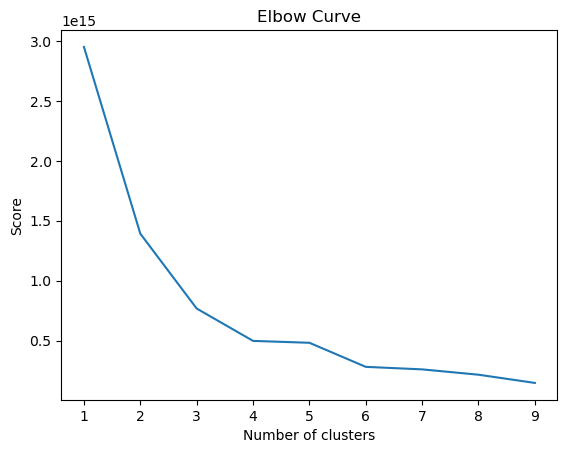

In [16]:
# Plot the scores to visualize the 'elbow'
pl.plot(num_cl,inertia)
pl.title('Elbow Curve')
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.show()

The curve begins to flatten out around 4 clusters. After 4, the reduction in score becomes less significant indicating that more clusters would greatly improve the model's fit. The ideal number of clusters for this dataset is 4. 

### 4. K-means clustering

In [19]:
# Create the kmeans object
Kmeans = KMeans(n_clusters=4)

In [20]:
# Fit the k-means object to the dataframe
Kmeans.fit(df_numerical)

KMeans(n_clusters=4)

In [21]:
# Create new column in dataframe to show the clusters
df_numerical['clusters'] = Kmeans.fit_predict(df_numerical)
df_numerical.head()

C:\Users\ashle\AppData\Local\Temp\ipykernel_21188\2461913864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['clusters'] = Kmeans.fit_predict(df_numerical)


price  price_per_sqft  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  221900.0      188.050847         3       1.00         1180      5650   
1  538000.0      209.338521         3       2.25         2570      7242   
2  180000.0      233.766234         2       1.00          770     10000   
3  604000.0      308.163265         4       3.00         1960      5000   
4  510000.0      303.571429         3       2.00         1680      8080   

   floors  view  condition  grade  house_age  years_since_renovation  \
0     1.0     0          3      7         69                      69   
1     2.0     0          3      7         73                      33   
2     1.0     0          3      6         91                      91   
3     1.0     0          5      7         59                      59   
4     1.0     0          3      8         37                      37   

   lot_size_acres  clusters  
0        0.129706         2  
1        0.166253         0  
2        0.229568         2  
3        0.114784         0  
4        0.185491         2

In [22]:
df_numerical['clusters'].value_counts()

clusters
2    12934
0     7259
3     1229
1      190
Name: count, dtype: int64

#### 3.1 Visualizations

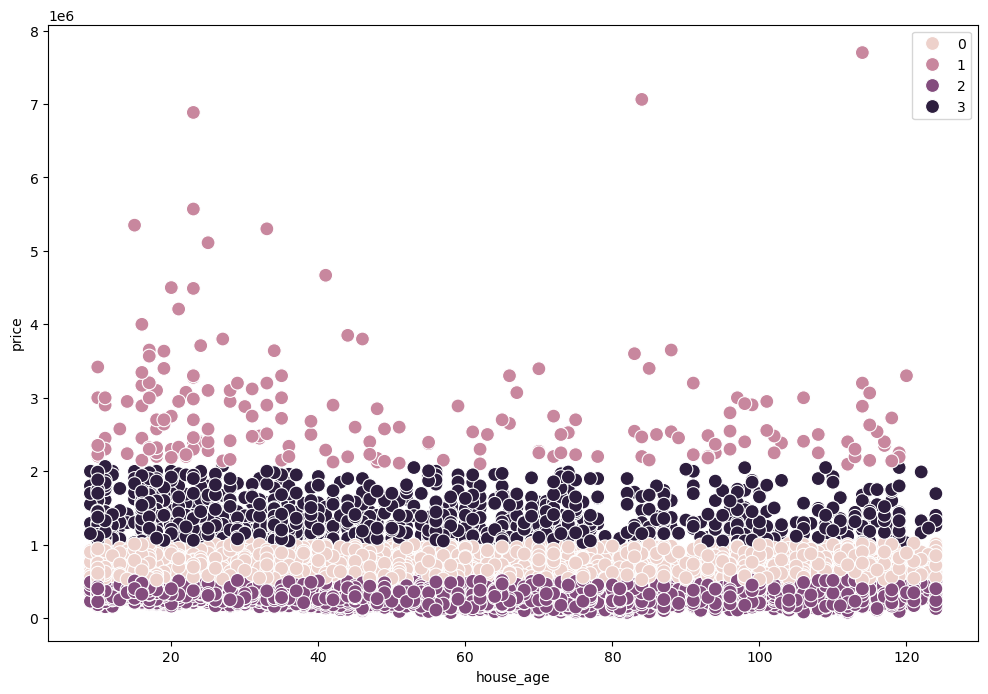

In [24]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['house_age'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

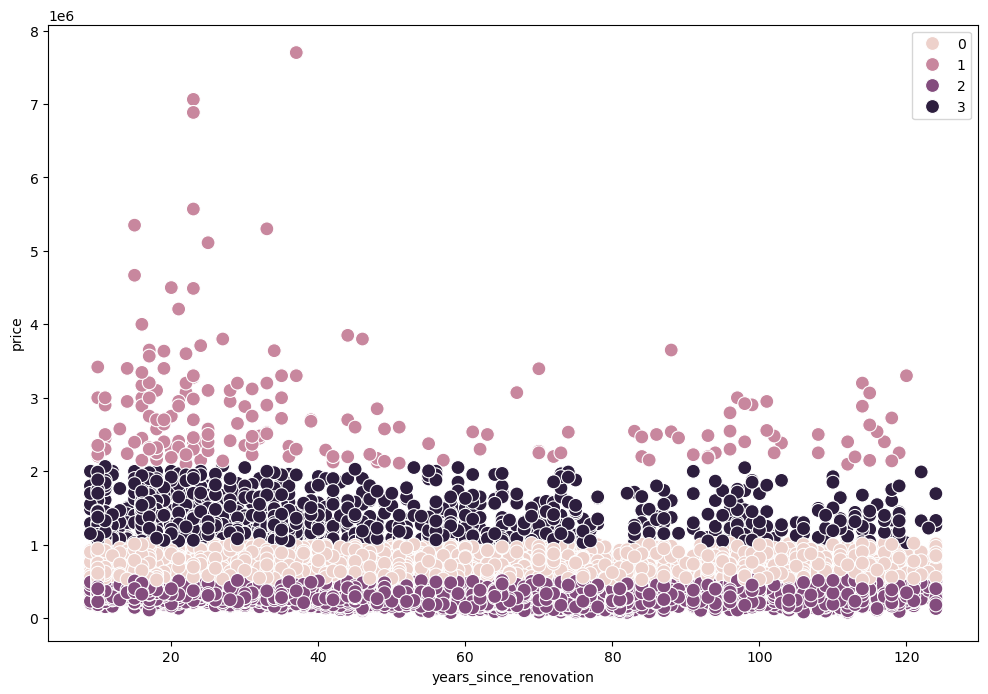

In [25]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['years_since_renovation'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

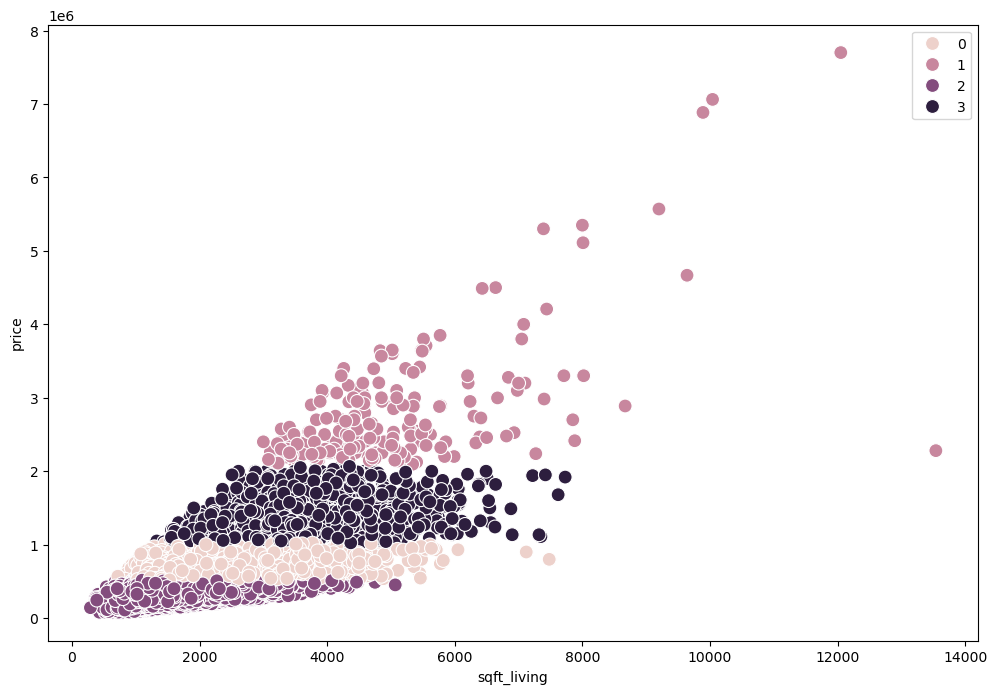

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['sqft_living'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

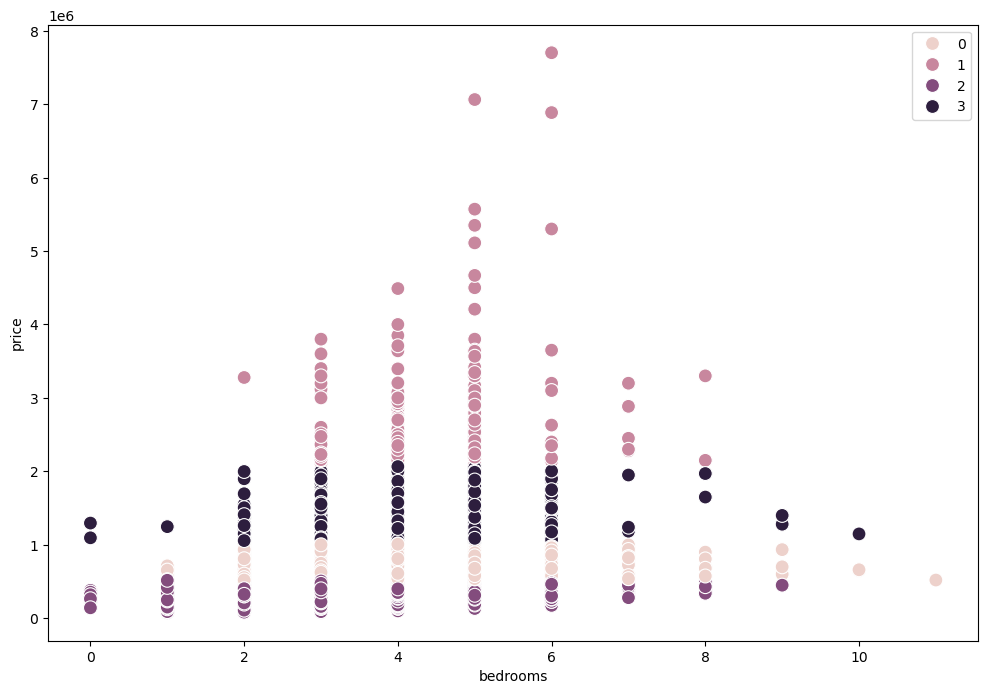

In [27]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['bedrooms'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

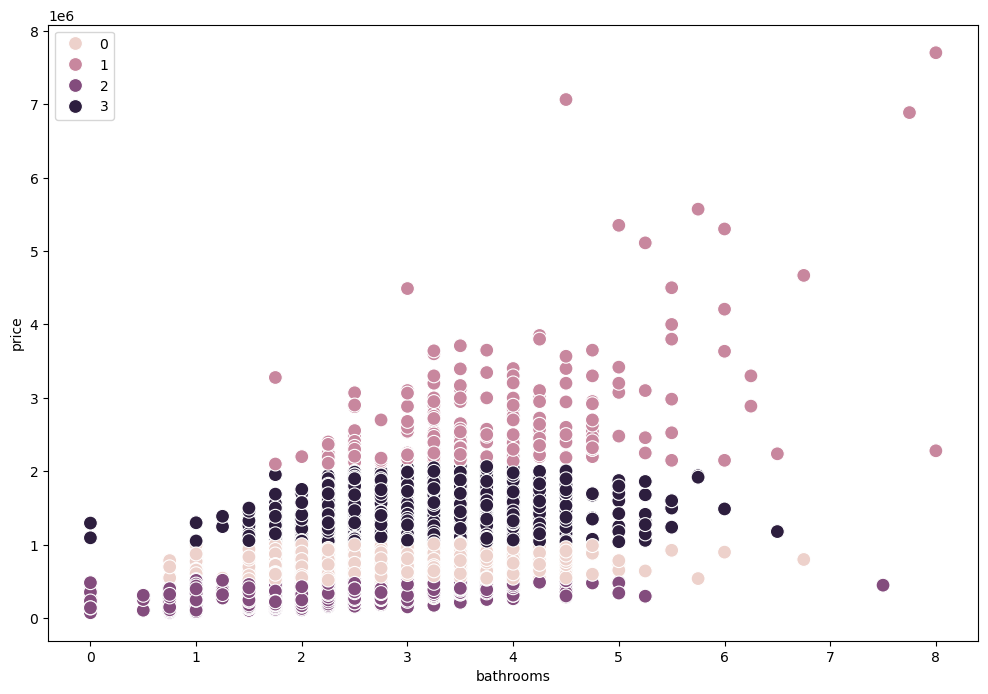

In [28]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['bathrooms'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

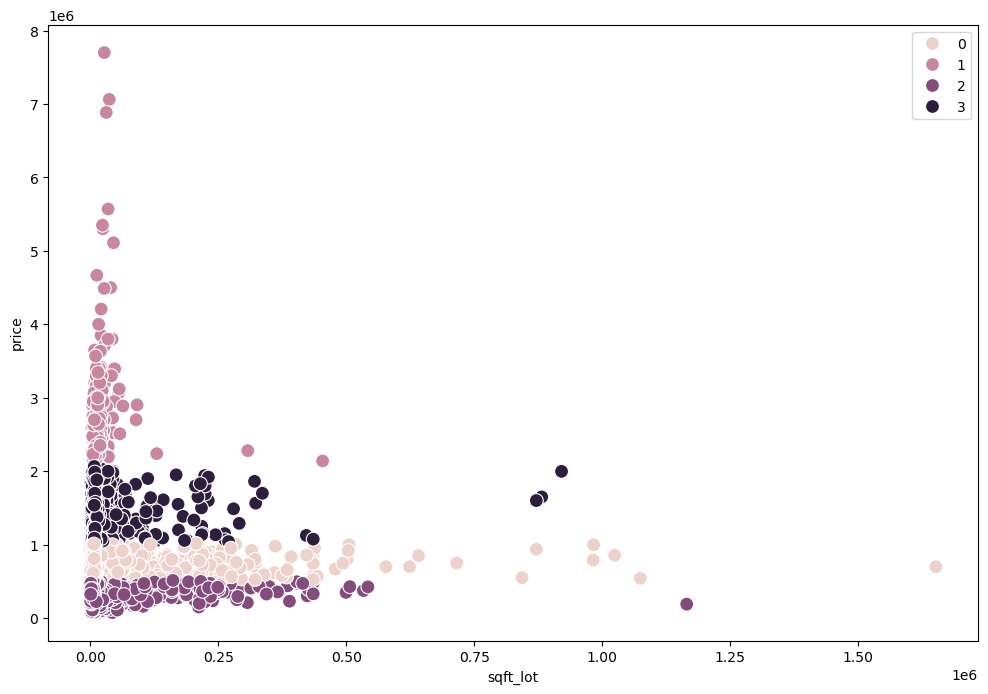

In [29]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['sqft_lot'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

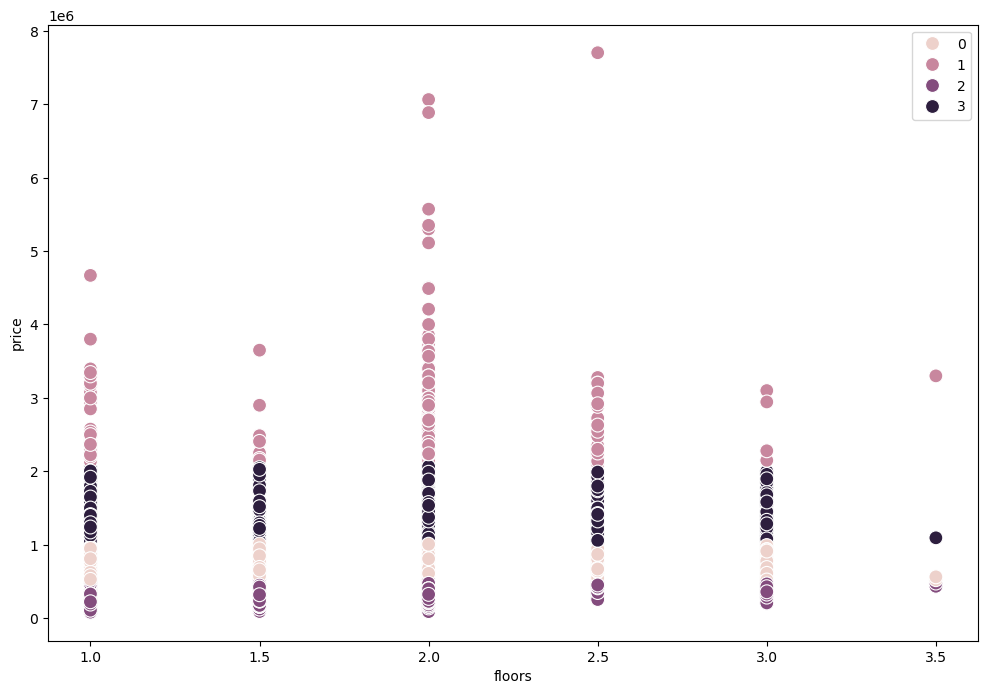

In [30]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['floors'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

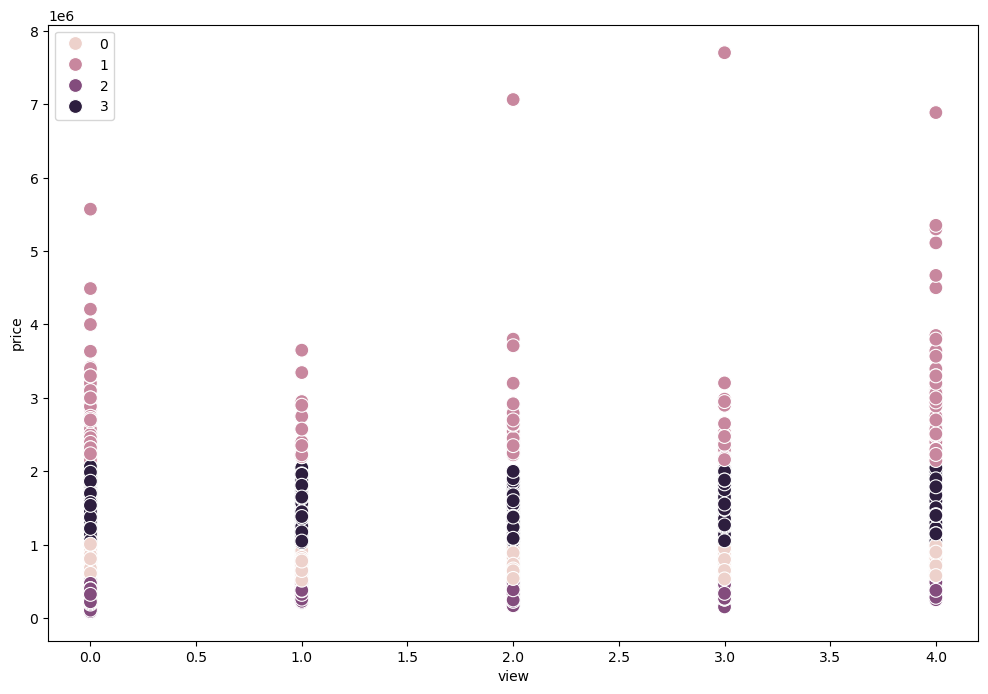

In [31]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['view'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

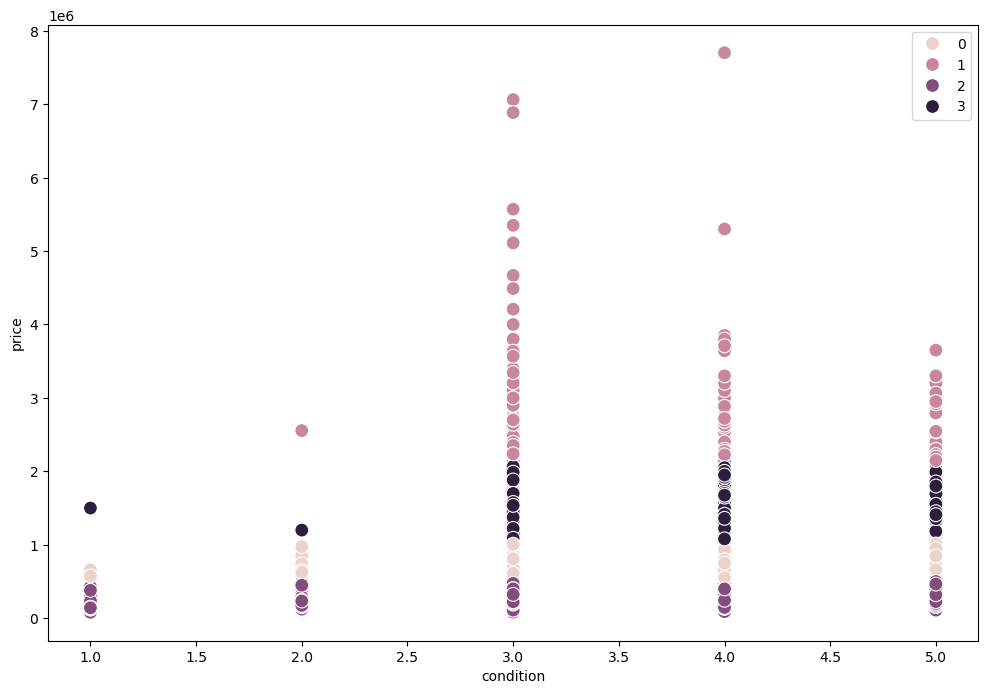

In [32]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['condition'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

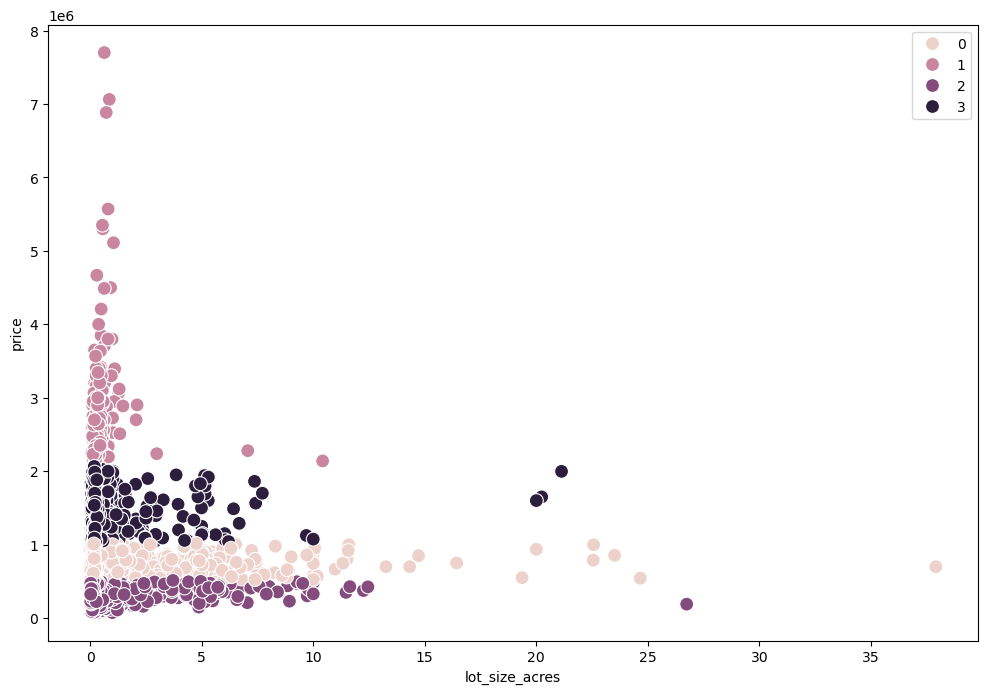

In [33]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['lot_size_acres'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

#### 3.2 Descriptive statistics and insights

In [35]:
# Calculate descriptive statistics for each cluster

pd.set_option('display.max_columns', None) # Displays all columns when it prints the results

df_numerical.loc[df_numerical['clusters'] == 3, 'clusters'] = 'dark purple'
df_numerical.loc[df_numerical['clusters'] == 2, 'clusters'] = 'purple'
df_numerical.loc[df_numerical['clusters'] == 1, 'clusters'] = 'light purple'
df_numerical.loc[df_numerical['clusters'] == 0, 'clusters'] = 'light pink'

df_numerical.groupby('clusters').agg({
    'house_age': ['mean', 'median'], 
    'years_since_renovation': ['mean', 'median'], 
    'sqft_living': ['mean', 'median'], 
    'price': ['mean', 'median'],
    'bedrooms': ['mean', 'median'],
    'bathrooms': ['mean', 'median'],
    'grade': ['mean', 'median'],
    'condition': ['mean', 'median'],
    'view': ['mean', 'median'],
    'lot_size_acres': ['mean', 'median']
})

C:\Users\ashle\AppData\Local\Temp\ipykernel_21188\2194256223.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_numerical.loc[df_numerical['clusters'] == 3, 'clusters'] = 'dark purple'


house_age        years_since_renovation         sqft_living  \
                   mean median                   mean median         mean   
clusters                                                                    
dark purple   48.717657   39.0              42.202604   33.0  3632.033360   
light pink    52.540433   46.0              49.458879   41.0  2456.036506   
light purple  51.742105   37.5              44.200000   29.0  5094.152632   
purple        53.672878   54.0              52.153703   51.0  1677.070203   

                             price             bedrooms        bathrooms  \
              median          mean     median      mean median      mean   
clusters                                                                   
dark purple   3530.0  1.358833e+06  1295000.0  4.031733    4.0  3.072823   
light pink    2400.0  6.893120e+05   660000.0  3.608210    4.0  2.362481   
light purple  4730.0  2.806109e+06  2528500.0  4.352632    4.0  3.873684   
purple        1600.0  3.452453e+05   345000.0  3.158110    3.0  1.858880   

                         grade        condition             view         \
             median       mean median      mean median      mean median   
clusters                                                                  
dark purple    3.00   9.637103   10.0  3.466233    3.0  1.126119    0.0   
light pink     2.50   8.188042    8.0  3.442761    3.0  0.312026    0.0   
light purple   3.75  10.752632   11.0  3.505263    3.0  2.010526    2.0   
purple         1.75   7.125174    7.0  3.383795    3.0  0.079867    0.0   

             lot_size_acres            
                       mean    median  
clusters                               
dark purple        0.537853  0.237856  
light pink         0.434709  0.171097  
light purple       0.528238  0.366667  
purple             0.276673  0.172176

**Light Purple:**
- Age: slightly older homes with an average of 51.7 years
- Years since renovation: moderate to more recently renovated, with an average of 44 years
- Square footage: the largest houses with an average of 5,094 sqft of living space
- Price: the most expensive houses with an average price of $2.8 million
- Bedrooms/Bathrooms: 4 bedrooms and 3.5-4 bathrooms
- Grade/Condition: Highest grade and condition with an average grade of 10-11 and condition of 3.5
- View: strongest view score with an average of 2.01
- Lot size: (average: 0.528238 acres) (median: 0.366667 acres)

    **Insight:** This cluster likely represents the most luxerious houses, with the highest prices, largest square footage, and premium features (best views, best grades). These could be luxury houses in highly desireable areas. 

**Light Pink:**
- Age: homes are older with a mean of 52.5 years
- Years since renovation: moderate, with a mean of 49.5 years
- Square footage: on the smaller side with an average of 2456 sqft
- Price: mid-range with an average of $689k
- Bedrooms/Bathrooms: 3-4 bedrooms, 2-3 bathrooms
- Grade/Condition: average to above average (grade 8, condition 3-4)
- View: minimal with an average of 0.31
- Lot size: (average: 0.434709) (median: 0.171097)

    **Insight:** This cluster likely represents mid-range, older homes on larger lots. They have average grades and conditions and limited views. This could correspond with homes in suburban or rural areas where larger lots are common, but the homes are older and less luxurious.

**Dark Purple:**
- Age: slightly newer homes with an average of 48.7
- Years since renovation: moderate to more recently renovated, with an average of 42 years
- Square footage: larger homes with an average of 3,632 sqft
- Price: higher-end with an average of $1.35 million
- Bedrooms/Bathrooms: around 4 bedrooms, 3 bathrooms
- Grade/Condition: higher-end with an average grade of 9.6 and condition 3.47
- View: slightly better views with an average of 1.13
- Lot Size: (average: 0.537853) (median: 0.237856)

    **Insight:** This cluster likely represents upscale properties with larger square footage, high grades, and better views. These are likely luxurious houses, possibly in wealthier suburban areas with spacious lots and high end features. 

**Purple:**
- Age: the oldest houses with an average of 53.7 years
- Years since renovation: long time since last renovated with an average of 52 years
- Square footage: the smallest houses with an average of 1676 sqft
- Price: lowest price, more affordable with an average price of $345K
- Bedrooms/Bathrooms: around 3 bedrooms and 1.5-2 bathrooms
- Lot size: smaller lot sizes with an average of 12,019 sqft
- Grade/Condition: average grade and condition (mean grade of 7 and condition of 3)
- View: very limited views with an average view score of 0.08

**Insight:** This cluster likely represents older, smaller, more affordable homes with lower grades and fewer amenities. These could be starter homes or homes in less desirable/less wealthy neighborhoods. 

**Given these results, next steps for an analytical pipeline would be to run separate regression analyses for each cluster to explore how different features influence price within each group.**